/Users/prithvi/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-09  153.779999  154.330002  150.419998  150.869995  150.031387   
2023-02-10  149.460007  151.339996  149.220001  151.009995  150.399887   
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.228439   
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.581055   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.702454   

              Volume    change  instant_return  
Date                                            
2023-02-09  56007100       NaN        0.000000  
2023-02-10  57450700  0.139999        0.000928  
2023-02-13  62199000  2.840012        0.018632  
2023-02-14  61707600 -0.650009       -0.004234  
2023-02-15  65573800  2.130005        0.013808  


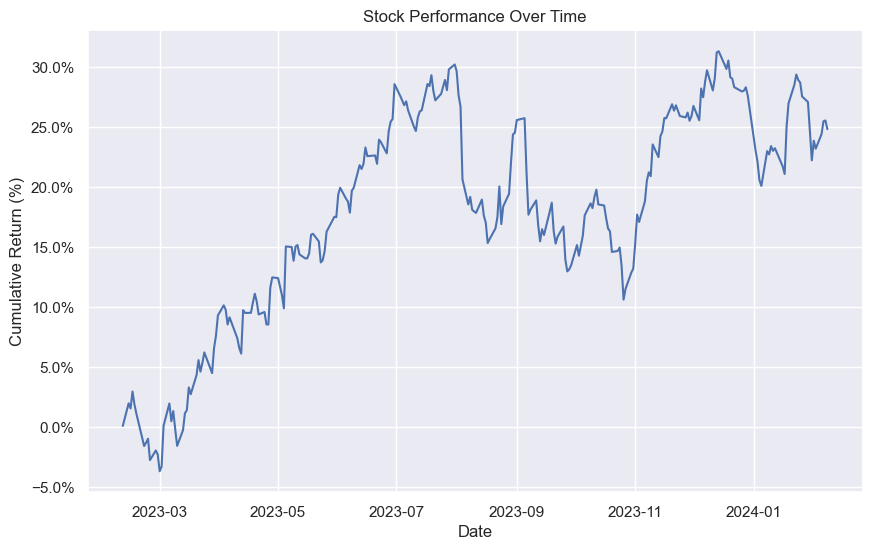

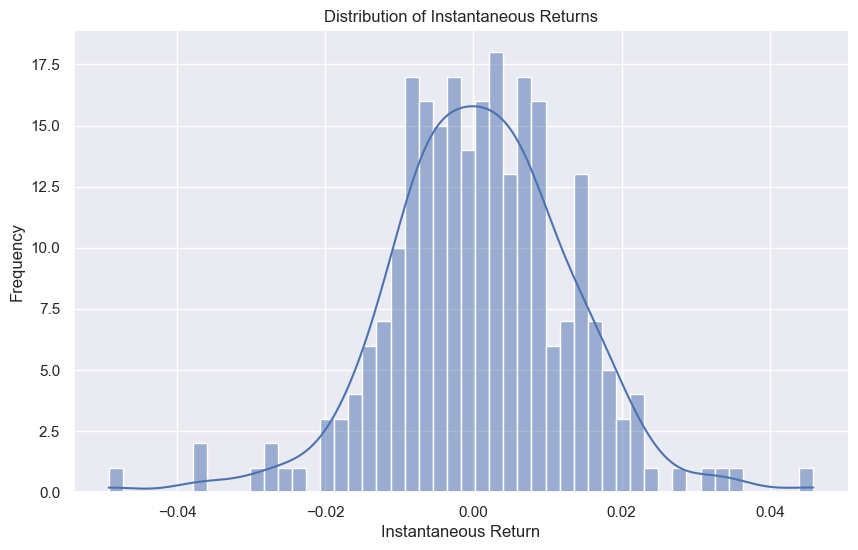

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
import yfinance as yf

sb.set_theme()

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    def get_data(self):
        data = yf.download(self.symbol, start=self.start, end=self.end)
        data.reset_index(inplace=True)
        data.set_index('Date', inplace=True)
        data.index = pd.to_datetime(data.index)
        self.calc_returns(data)
        return data

    def calc_returns(self, df):
        df['change'] = df['Close'].diff()
        df['instant_return'] = np.log(df['Close'] / df['Close'].shift(1))
        df['instant_return'].fillna(0, inplace=True)  # Replace NaN values with 0

    def plot_return_dist(self):
        plt.figure(figsize=(10,6))
        sb.histplot(self.data['instant_return'], bins=50, kde=True)
        plt.xlabel('Instantaneous Return')
        plt.ylabel('Frequency')
        plt.title('Distribution of Instantaneous Returns')
        plt.show()

    def plot_performance(self):
        plt.figure(figsize=(10,6))
        performance = (self.data['Close'].pct_change() + 1).cumprod() - 1
        plt.plot(performance * 100)
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return (%)')
        plt.title('Stock Performance Over Time')
        plt.show()

def main():
    # Replace 'AAPL' with the desired stock symbol
    test = Stock(symbol='AAPL')
    print(test.data.head())
    test.plot_performance()
    test.plot_return_dist()

if __name__ == '__main__':
    main()
